# Penalized Regression Approach

## Trend Following Strategies

Two Types of Momentum Strategies

* Absolute Momentum (Time Series Momentum)

* Relative Momentum (Cross-sectional Momentum)


***

## Asset Classes

* Momentum in Equities - [Jagadeesh and Titman (1993)](http://www.bauer.uh.edu/rsusmel/phd/jegadeesh-titman93.pdf)

* Momentum in Commodities - Well know to CTA practitioners. 

  *  [The Tactical and Strategic Value of Commodity Futures](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=650923)

  *  [Momentum Strategies in Commodity Futures Markets](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=702281)

  *  [Tactical allocation in commodity futures markets: Combining momentum and term structure signals](http://www.cassknowledge.com/sites/default/files/article-attachments/131~~131_anamariafuertes_tactical_allocation_in_commodity_futures_markets.pdf)

* Momentum in Fixed Income

  * [Value and Momentum Everywhere](http://pages.stern.nyu.edu/~lpederse/papers/ValMomEverywhere.pdf)

* Momentum in Currency Markets

  *  [Do Momentum-Based Strategies Still Work in Foreign Currency Markets?](http://my.liuc.it/MatSup/2006/F86032/Okunev-White_MomentumBasedStrategiesInFXMarkets-JFQA-2003.pdf)

  * [Carry Trade and Momentum in Currency Markets](http://www.nber.org/papers/w16942)










***

## Risks of Momentum Strategies

Increased risk during market turning points & period of increase volatility

* Crashes after long rallies
* Sharp recoveries after prolonged bear markets
* Underperform during mean reverting regime

Observed heightened 

* Tail risk
* Negative skewness 

## Other Observations

Multiasset momentum strategy tends to work better than single asset momentum strategy due to diversification. However, this is not as effective when cross-asset correlations are high. Such was the case during 2010 - 2012 period.



 
 

***

# Machine Learning & Trend Following Strategy

Application of Lasso Regression to estimate 1-day returns of assets in a cross-asset momentum model. 

* Predict the returns of 4 assets: 
  *  S&P 500, 
  *  10Y Treasury Bond Index, 
  *  US dollar (DXY) 
  *  Gold. 
  
Independent variables:
  * Lagged 1M returns 
  * Lagged 3M returns 
  * Lagged 6M returns 
  * Lagged 12M returns 
  
  
To calibrate the model, we used a rolling window of 500 trading days (~2y); 
re-calibration was performed once every 3 months. 

The model was used to predict the next day’s return. 

If the next day predicted return was positive, we went long the asset, otherwise we shorted it. 

Prior to regression, all inputs were standardized to avoid the problem of input features being of different scales.  

## OLS

$$y=\beta_0 + \sum^n_{i=1}\beta_i x_i + \varepsilon$$

## OLS Minimize Historical Sum of

$$(y-(\beta_0 + \sum^n_{i=1}\beta_i x_i))^2$$

## Lasso Minimize Historical Sum of

$$(y-(\beta_0 + \sum^n_{i=1}\beta_i x_i))^2 + \alpha \sum^n_{i=1} \lvert \beta_i \rvert$$


## Ridge Minimize Historical Sum of

$$(y-(\beta_0 + \sum^n_{i=1}\beta_i x_i))^2 + \alpha \sum^n_{i=1} \beta_i^2$$




In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import linear_model

In [3]:
tickers = ['SPY', 'IEF', 'UUP', 'GLD']
data = get_pricing(symbols(tickers), start_date='2007-4-1', end_date='2009-8-1', 
                   fields='close_price', frequency='daily')
data.columns = [ticker.symbol for ticker in data.columns]
data.index.name = 'Date'

In [4]:
data.tail()

,SPY,IEF,UUP,GLD
Date,,,,
2009-07-27 00:00:00+00:00,98.350,89.65,23.42,93.71
2009-07-28 00:00:00+00:00,98.060,89.86,23.49,92.10
2009-07-29 00:00:00+00:00,97.658,89.89,23.67,91.19
2009-07-30 00:00:00+00:00,98.710,90.28,23.62,91.60
2009-07-31 00:00:00+00:00,98.830,91.21,23.32,93.36


In [5]:
data[:-1].tail()

,SPY,IEF,UUP,GLD
Date,,,,
2009-07-24 00:00:00+00:00,98.060,90.12,23.44,93.45
2009-07-27 00:00:00+00:00,98.350,89.65,23.42,93.71
2009-07-28 00:00:00+00:00,98.060,89.86,23.49,92.10
2009-07-29 00:00:00+00:00,97.658,89.89,23.67,91.19
2009-07-30 00:00:00+00:00,98.710,90.28,23.62,91.60


In [6]:
res_1m = []
for e in data.columns:
    res_1m.append(data[e].pct_change(20)[1:])
res_1m = pd.DataFrame(res_1m).T    
res_1m.columns = [e + '_1m' for e in data.columns]
res_1m = res_1m.dropna()

In [7]:
res_3m = []
for e in data.columns:
    res_3m.append(data[e].pct_change(60)[1:])
res_3m = pd.DataFrame(res_3m).T    
res_3m.columns = [e + '_3m' for e in data.columns]
res_3m = res_3m.dropna()

In [8]:
res_6m = []
for e in data.columns:
    res_6m.append(data[e].pct_change(120)[1:])
res_6m = pd.DataFrame(res_6m).T    
res_6m.columns = [e + '_6m' for e in data.columns]
res_6m = res_6m.dropna()

In [9]:
res_12m = []
for e in data.columns:
    res_12m.append(data[e].pct_change(240)[1:])
res_12m = pd.DataFrame(res_12m).T    
res_12m.columns = [e + '_12m' for e in data.columns]
res_12m = res_12m.dropna()

In [10]:
res = res_1m.join(res_3m).join(res_6m).join(res_12m)
res = res.dropna()
res.head()

,SPY_1m,IEF_1m,UUP_1m,GLD_1m,SPY_3m,IEF_3m,UUP_3m,GLD_3m,SPY_6m,IEF_6m,UUP_6m,GLD_6m,SPY_12m,IEF_12m,UUP_12m,GLD_12m
Date,,,,,,,,,,,,,,,,
2008-03-14 00:00:00+00:00,-0.042654,0.033119,-0.053538,0.100591,-0.104303,0.063305,-0.070765,0.264890,-0.146656,0.099234,-0.074197,0.365311,-0.078586,0.106803,-0.096029,0.499271
2008-03-17 00:00:00+00:00,-0.053020,0.035958,-0.058601,0.112395,-0.118225,0.065916,-0.069765,0.251356,-0.151570,0.103297,-0.081659,0.373964,-0.096848,0.113428,-0.104920,0.504856
2008-03-18 00:00:00+00:00,-0.012735,0.036334,-0.048955,0.053068,-0.079598,0.050849,-0.061635,0.216448,-0.116075,0.095501,-0.068587,0.332781,-0.059426,0.103823,-0.093340,0.443496
2008-03-19 00:00:00+00:00,-0.042248,0.047023,-0.048127,-0.000965,-0.105619,0.061826,-0.061953,0.184211,-0.139901,0.105528,-0.070475,0.292314,-0.083436,0.116890,-0.089250,0.393627
2008-03-20 00:00:00+00:00,-0.008129,0.036785,-0.030591,-0.036568,-0.099894,0.070646,-0.053906,0.121738,-0.123267,0.101645,-0.058584,0.236274,-0.063126,0.122919,-0.085043,0.348949


In [11]:
y = data['SPY'].pct_change()[1:][len(data['SPY'].pct_change()) - len(res):]
y.head()

Date
2008-03-17 00:00:00+00:00   -0.010456
2008-03-18 00:00:00+00:00    0.042381
2008-03-19 00:00:00+00:00   -0.022204
2008-03-20 00:00:00+00:00    0.023217
2008-03-24 00:00:00+00:00    0.015373
Freq: C, Name: SPY, dtype: float64

In [12]:
len(y)

348

In [13]:
y.head()

Date
2008-03-17 00:00:00+00:00   -0.010456
2008-03-18 00:00:00+00:00    0.042381
2008-03-19 00:00:00+00:00   -0.022204
2008-03-20 00:00:00+00:00    0.023217
2008-03-24 00:00:00+00:00    0.015373
Freq: C, Name: SPY, dtype: float64

In [14]:
y.tail()

Date
2009-07-27 00:00:00+00:00    0.002957
2009-07-28 00:00:00+00:00   -0.002949
2009-07-29 00:00:00+00:00   -0.004100
2009-07-30 00:00:00+00:00    0.010772
2009-07-31 00:00:00+00:00    0.001216
Freq: C, Name: SPY, dtype: float64

In [15]:
X = res.shift(1).dropna().copy()
X.head()

,SPY_1m,IEF_1m,UUP_1m,GLD_1m,SPY_3m,IEF_3m,UUP_3m,GLD_3m,SPY_6m,IEF_6m,UUP_6m,GLD_6m,SPY_12m,IEF_12m,UUP_12m,GLD_12m
Date,,,,,,,,,,,,,,,,
2008-03-17 00:00:00+00:00,-0.042654,0.033119,-0.053538,0.100591,-0.104303,0.063305,-0.070765,0.264890,-0.146656,0.099234,-0.074197,0.365311,-0.078586,0.106803,-0.096029,0.499271
2008-03-18 00:00:00+00:00,-0.053020,0.035958,-0.058601,0.112395,-0.118225,0.065916,-0.069765,0.251356,-0.151570,0.103297,-0.081659,0.373964,-0.096848,0.113428,-0.104920,0.504856
2008-03-19 00:00:00+00:00,-0.012735,0.036334,-0.048955,0.053068,-0.079598,0.050849,-0.061635,0.216448,-0.116075,0.095501,-0.068587,0.332781,-0.059426,0.103823,-0.093340,0.443496
2008-03-20 00:00:00+00:00,-0.042248,0.047023,-0.048127,-0.000965,-0.105619,0.061826,-0.061953,0.184211,-0.139901,0.105528,-0.070475,0.292314,-0.083436,0.116890,-0.089250,0.393627
2008-03-24 00:00:00+00:00,-0.008129,0.036785,-0.030591,-0.036568,-0.099894,0.070646,-0.053906,0.121738,-0.123267,0.101645,-0.058584,0.236274,-0.063126,0.122919,-0.085043,0.348949


In [16]:
len(X)

348

In [17]:
test_start = '2009-01-01'

In [18]:
X_train = X[X.index < test_start]
X_test = X[X.index >= test_start]
y_train = y[y.index < test_start]
y_test = y[y.index >= test_start]

In [19]:
X_train.shape, y_train.shape

((202, 16), (202,))

In [20]:
X_test.shape, y_test.shape

((146, 16), (146,))

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [22]:
reg = linear_model.Lasso(alpha = 0.001, normalize = True)
reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
reg.coef_

array([-0.16418942, -0.        ,  0.        , -0.21856453, -0.50206252,
       -0.        , -0.62733462, -0.15477977,  0.        , -0.1532608 ,
       -0.        , -0.        , -0.22953686,  0.18436376, -0.20571683,  0.        ])

In [24]:
reg.intercept_

-9.80788112121755e-17

## Linear Regression

In [33]:
regressor = linear_model.LinearRegression()

In [34]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
regressor.coef_

array([-0.16791467, -0.14084734, -0.1453592 , -0.59602067, -0.84312129,
        0.07341183, -1.05853671, -0.42912686,  0.30837576, -0.20362043,
        0.79458629,  0.04501527, -1.0316316 ,  0.3304617 , -0.6843242 ,
        0.74700051])

# Evaluating our ML Regressor

In [25]:
# Transform test data
X_test_trans = sc_X.transform(X_test)

In [26]:
# Predict!
y_pred = reg.predict(X_test_trans)

In [27]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [28]:
explained_variance_score(y_test, y_pred)  

-360.40023601777619

In [29]:
mean_absolute_error(y_test, y_pred)  

0.53520912198156101

In [30]:
mean_squared_error(y_test, y_pred)  

0.37995708091633373

In [31]:
r2_score(y_test, y_pred)  

-911.03534579420671

# Tearsheet

Linear Regression

In [36]:
bt = get_backtest('596cbed9a625dc549d3d6ab7')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2010-06-01
Entire data end date: 2015-12-31


Backtest Months: 67


Performance statistics,Backtest
annual_return,-0.02
cum_returns_final,-0.13
annual_volatility,0.16
sharpe_ratio,-0.08
calmar_ratio,-0.07
stability_of_timeseries,0.54
max_drawdown,-0.35
omega_ratio,0.99
sortino_ratio,-0.11
skew,-0.29


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,34.57,2011-03-16,2015-08-25,NaT,NaN
1,8.81,2010-06-17,2010-07-02,2010-08-02,33
2,7.61,2010-09-24,2010-11-05,2011-01-05,74
3,6.86,2010-08-09,2010-08-26,2010-09-15,28
4,4.71,2010-06-03,2010-06-07,2010-06-15,9




[-0.02  -0.041]


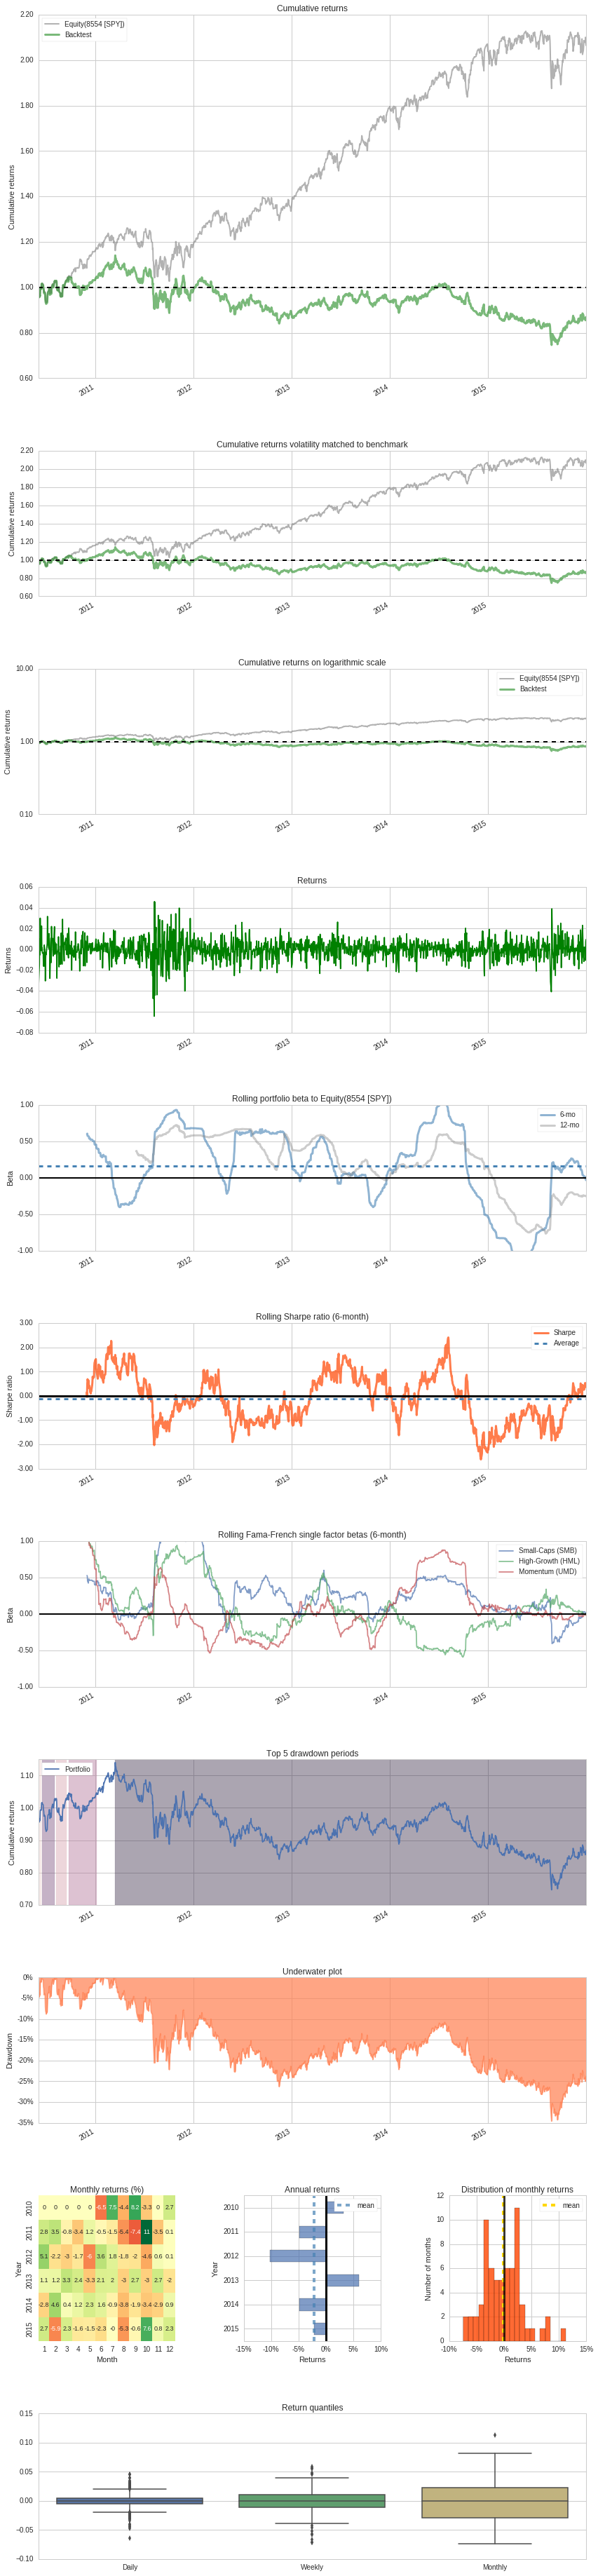

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.06%,-6.43%,4.60%
Fukushima,-0.11%,-1.41%,1.78%
EZB IR Event,-0.10%,-1.88%,1.12%
Apr14,0.05%,-2.13%,1.09%
Oct14,-0.14%,-1.85%,2.04%
Fall2015,-0.18%,-4.08%,3.91%
Recovery,-0.01%,-6.43%,4.60%
New Normal,0.00%,-4.08%,3.91%


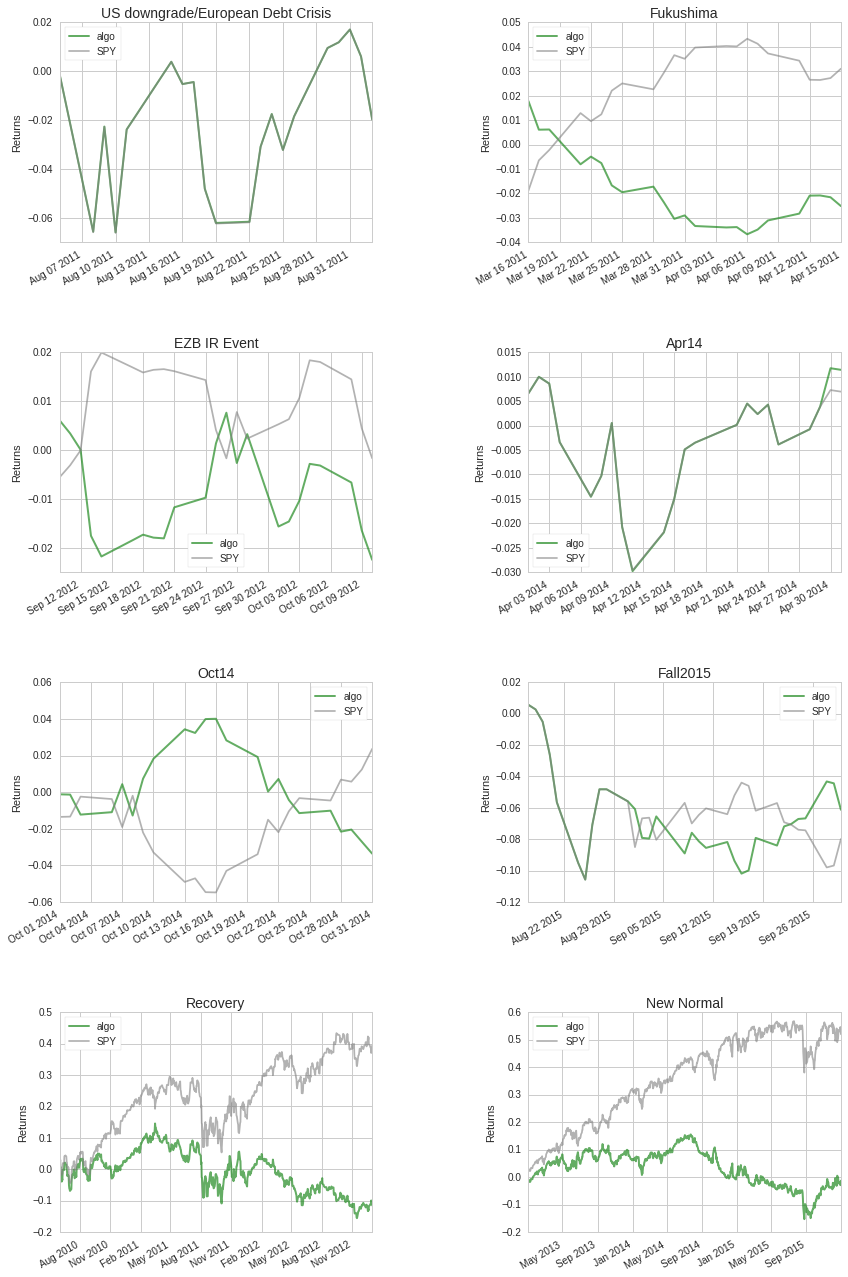

Top 10 long positions of all time,max
SPY-8554,100.60%


Top 10 short positions of all time,max
SPY-8554,-120.91%


Top 10 positions of all time,max
SPY-8554,120.91%


All positions ever held,max
SPY-8554,120.91%


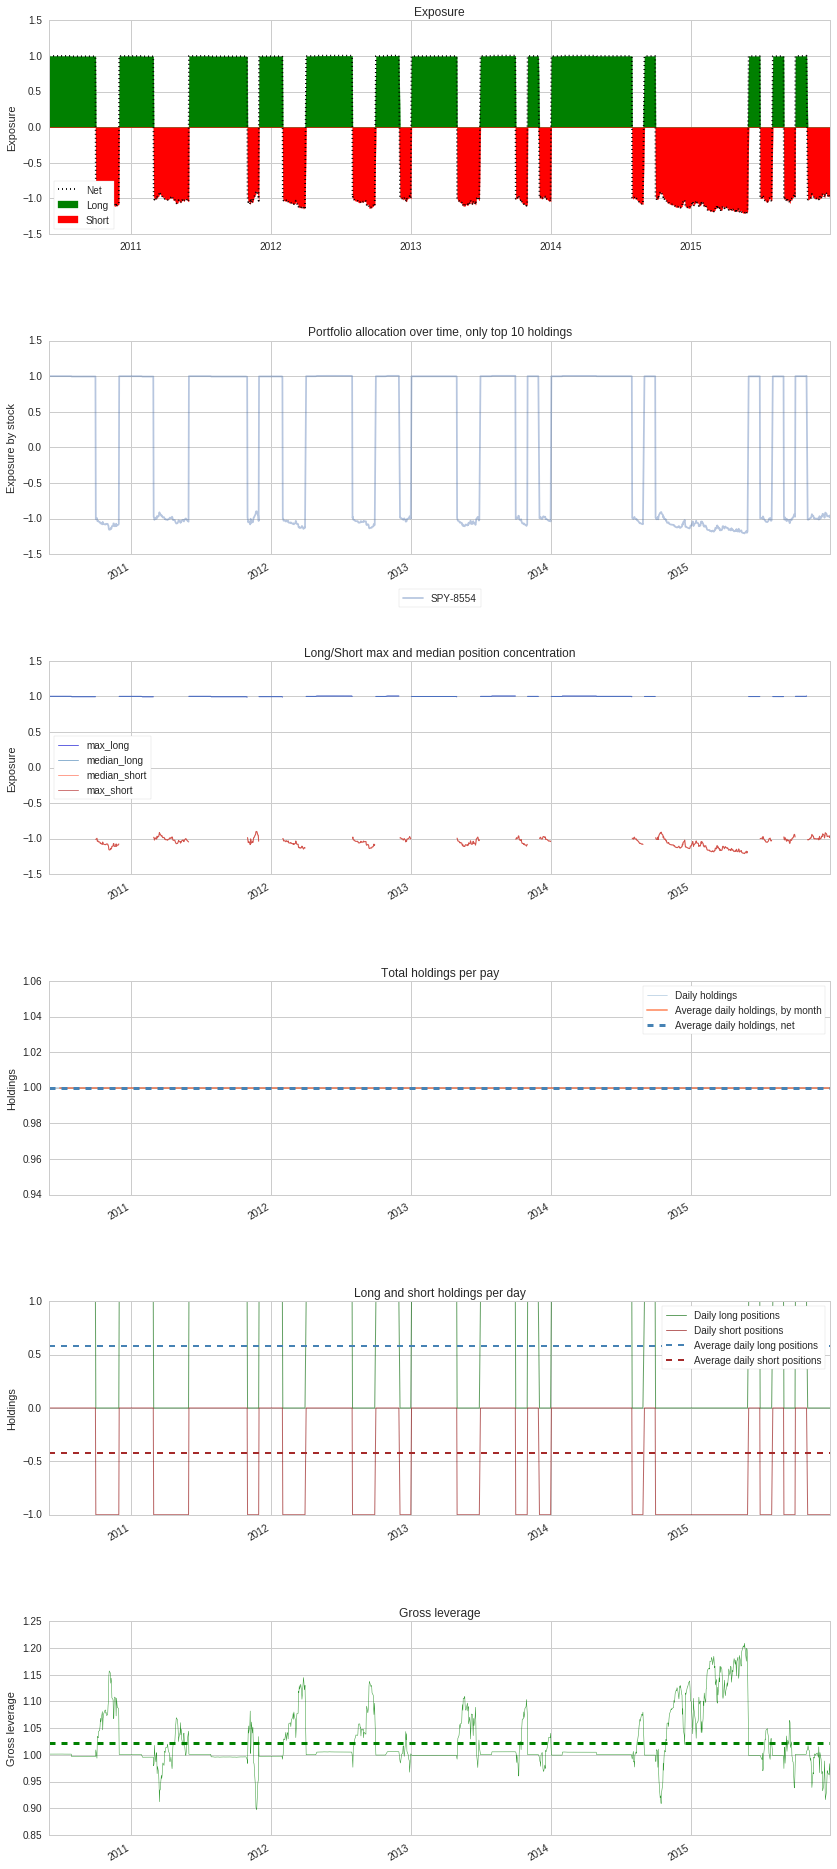

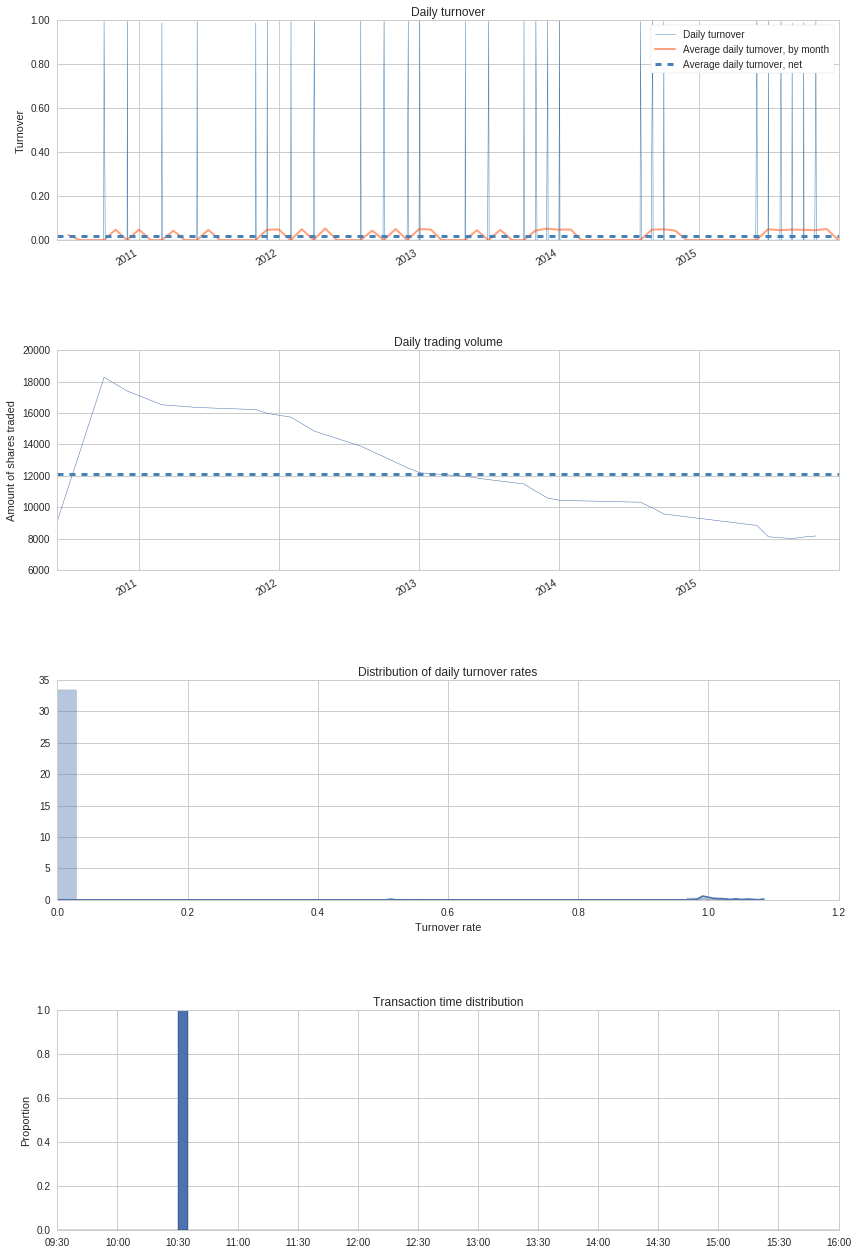

In [37]:
bt.create_full_tear_sheet()

Lasso

In [38]:
bt = get_backtest('596cbf052493b4522b5156f6')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2010-06-01
Entire data end date: 2015-12-31


Backtest Months: 67


Performance statistics,Backtest
annual_return,0.09
cum_returns_final,0.59
annual_volatility,0.15
sharpe_ratio,0.62
calmar_ratio,0.50
stability_of_timeseries,0.59
max_drawdown,-0.17
omega_ratio,1.12
sortino_ratio,0.92
skew,0.20


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,17.31,2014-12-16,2015-08-25,NaT,NaN
1,16.70,2011-11-25,2012-11-15,2013-09-10,468
2,15.39,2013-09-18,2014-02-03,2014-12-16,325
3,8.50,2011-10-28,2011-11-08,2011-11-23,19
4,7.57,2011-03-16,2011-04-18,2011-05-23,49




[-0.019 -0.038]


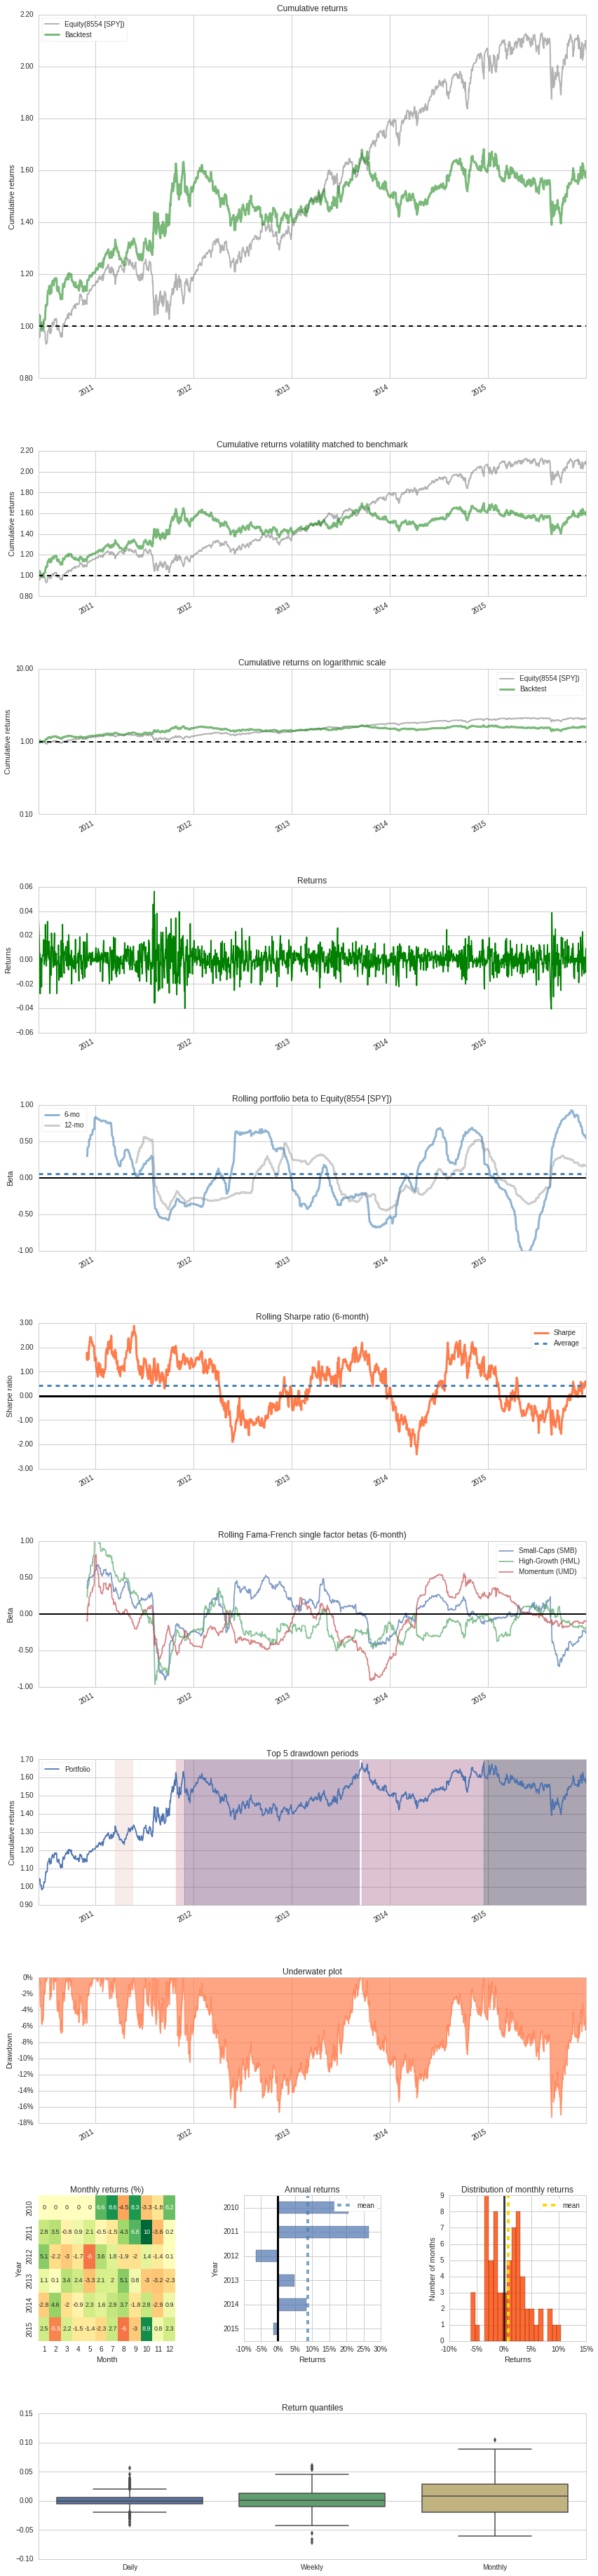

Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.11%,-3.58%,5.65%
Fukushima,-0.21%,-1.41%,1.78%
EZB IR Event,0.04%,-1.76%,1.12%
Apr14,-0.04%,-2.12%,1.09%
Oct14,0.13%,-2.01%,1.95%
Fall2015,-0.26%,-4.06%,3.89%
Recovery,0.06%,-4.02%,5.65%
New Normal,0.02%,-4.06%,3.89%


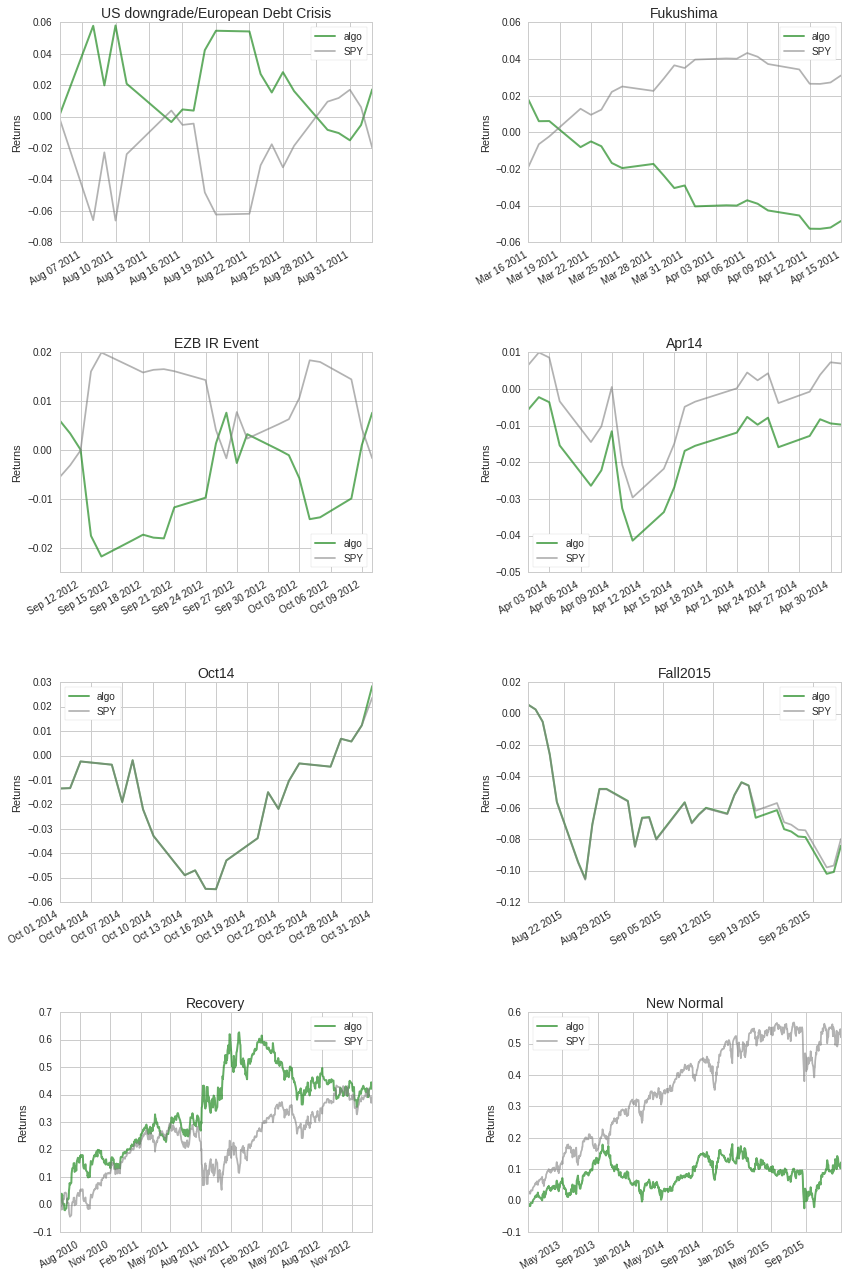

Top 10 long positions of all time,max
SPY-8554,100.62%


Top 10 short positions of all time,max
SPY-8554,-119.74%


Top 10 positions of all time,max
SPY-8554,119.74%


All positions ever held,max
SPY-8554,119.74%


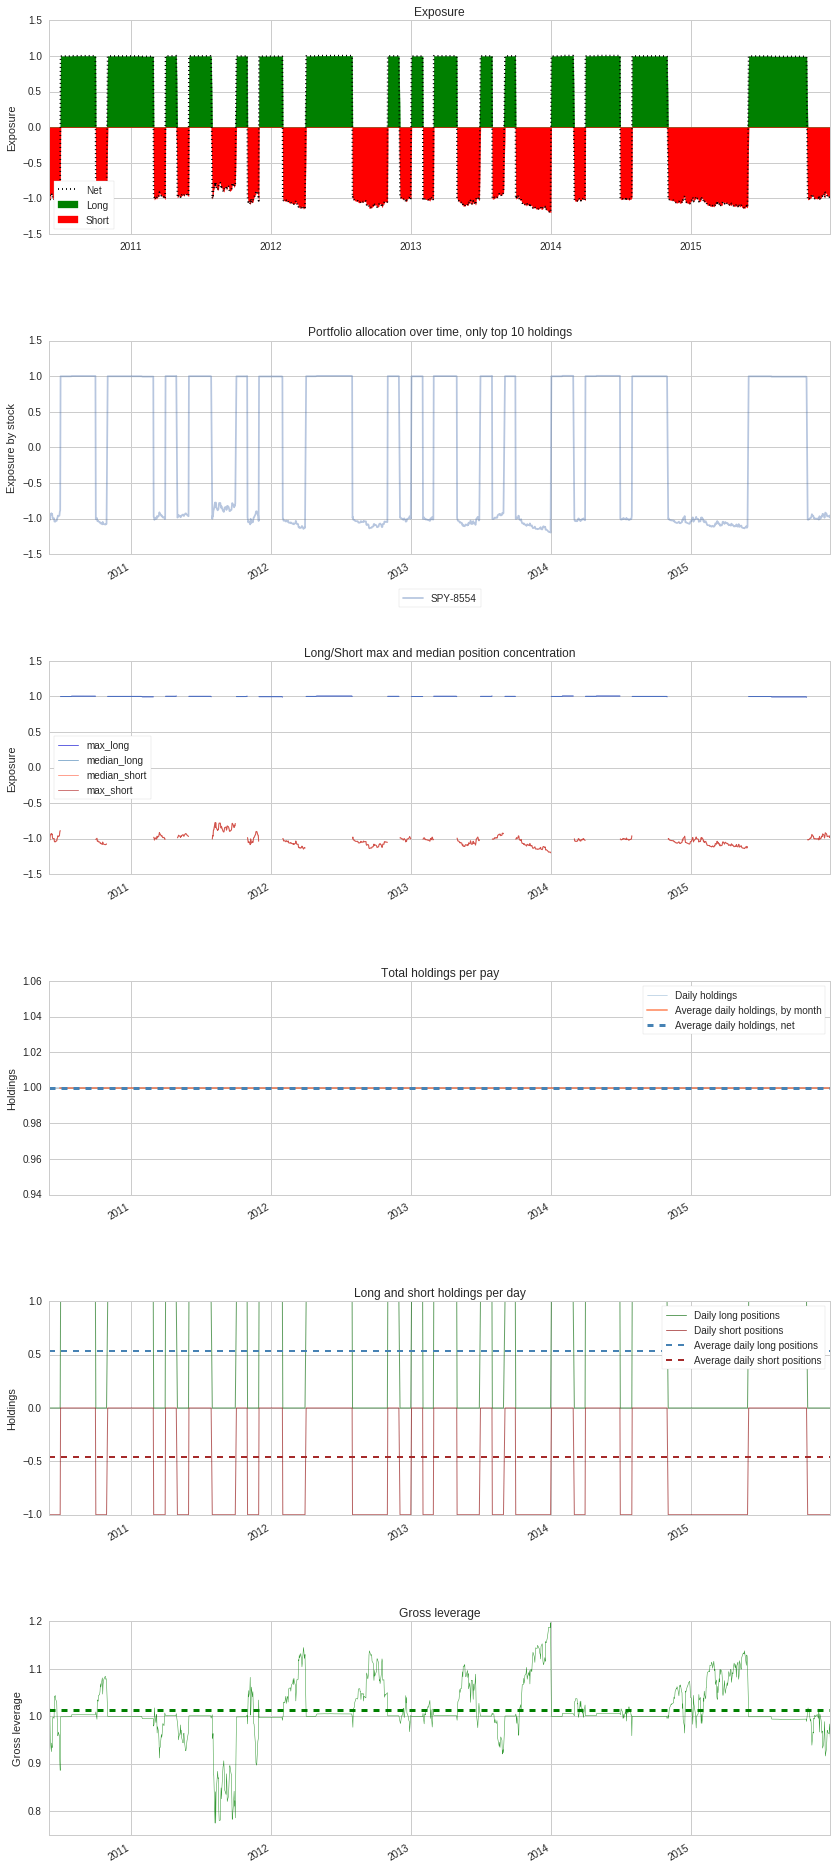

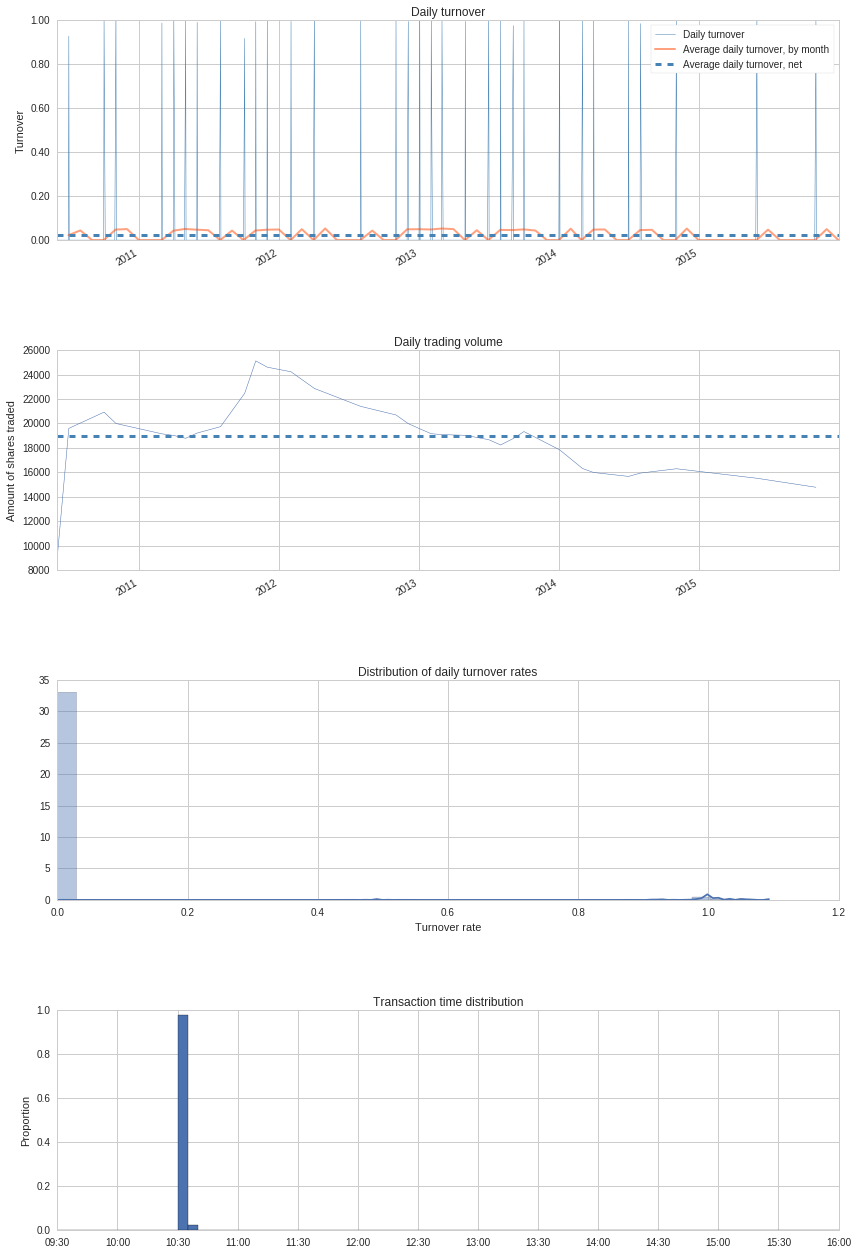

In [39]:
bt.create_full_tear_sheet()